# Gradient descent vs Newton Raphson

This compares these two popular methods for solving non-linear equations.

We have a function $F(x)=x^2-4$. For gradient-descent, we cast the problem as the minimisation of the cost function $J(x)=\frac{1}{2}\lVert{F(x)-0}\Vert^2$. But because we are cheap we know that is the same as minimising $J(x)=\frac{1}{2}F(x)^2$ Its gradient is thus $\nabla J(x)=F(x)\nabla F(x)$

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
h=1e-6 
nit=10
def gradient(func,x):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
    return 2.0*x

def func(x):
    return np.square(x)

def gradient_descent(func,x,alpha):
    x_full=[x]
    #Minimise distance to zero
    for i in range(nit):
        x-=alpha*func(x)*gradient(func,x)  
        x_full.append(x)
    return x,x_full

def newton_raphson(func,x,a):
    x_full=[x]
    for i in range(nit):
        x-=a*func(x)/gradient(func,x)
        x_full.append(x)
    return x,x_full

Final solution and cost of Gradient descent:: 1.914218
Final solution and cost of Newton-Raphson: 0.004883


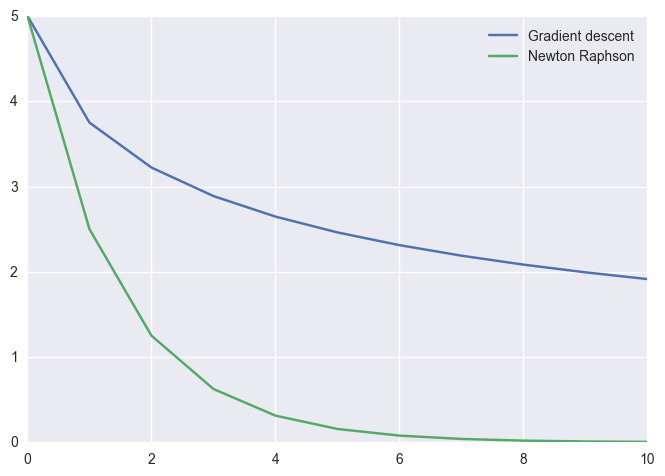

In [52]:
x,x_full=gradient_descent(func,5,0.005)
x2,x2_full=newton_raphson(func,5,1)
print("Final solution and cost of Gradient descent:: %f" %x)
print("Final solution and cost of Newton-Raphson: %f"%x2)
#x_full=np.array(x_full)
its=np.arange(nit+1)
plt.plot(its,x_full)
plt.plot(its,x2_full)
plt.legend(('Gradient descent','Newton Raphson'))
plt.show()


But let's try now a different learning rate

Final solution and cost of Gradient descent:: 0.000000
Final solution and cost of Newton-Raphson: 0.004883


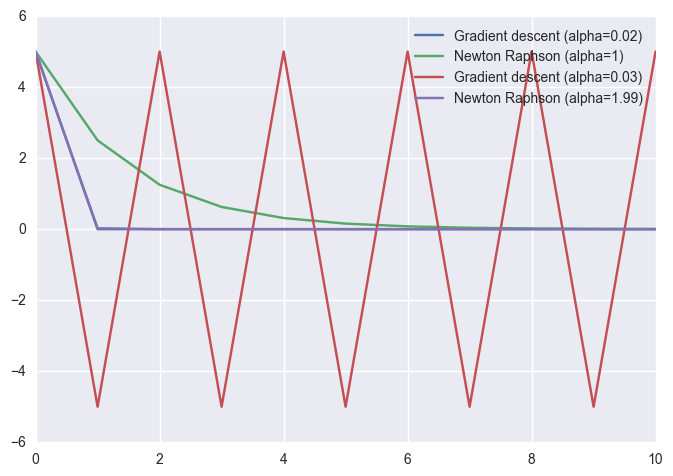

In [72]:
x,x_full=gradient_descent(func,5,0.02)
x2,x2_full=newton_raphson(func,5,1.)
print("Final solution and cost of Gradient descent:: %f" %x)
print("Final solution and cost of Newton-Raphson: %f"%x2)
x3,x3_full=gradient_descent(func,5,0.04)
x4,x4_full=newton_raphson(func,5,1.99)
its=np.arange(nit+1)
plt.plot(its,x_full)
plt.plot(its,x2_full)
plt.plot(its,x3_full)
plt.plot(its,x4_full)
plt.legend(('Gradient descent (alpha=0.02)','Newton Raphson (alpha=1)','Gradient descent (alpha=0.03)','Newton Raphson (alpha=1.99)'))
plt.show()


The performance of the algorithms seems to depends strongly on their learning rate. Very high values cause oscillations and instabilities. Low values cause slow convergence.
Let's now try 2D. $F(x,y)=x^2+y^2-4$. This is still a scalar function.

In [27]:
h=1e-6 
nitmax=400
start=np.array([4,-5],dtype='float128')
x_full_sys=np.array(start)

def gradient(x_loc,limit=False):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
        grad=np.array(2.0*x_loc,dtype='float128')
        if limit==False:
            return grad
        else:
            larger=np.abs(grad)>1
            grad[larger]=np.sign(grad[larger])*1
            smaller=np.abs(grad)<0.01
            grad[smaller]=np.sign(grad[smaller])*0.01
            return grad
        

def func(x):
     if x.ndim==1:
        return np.square(x,dtype='float128').sum()-4
     else:
        return np.square(x,dtype='float128').sum(axis=1)-4
    
def cost(x):
    
    return np.square(func(x),dtype='float128'),np.dot(func(x),gradient(x))


def acc(xp):
    global x_full_sys
    x_full_sys=np.vstack((x_full_sys,xp))
    return 0
def norm(x):
    return np.sqrt(x.dot(x))

def gradient_descent(func,start,alpha,tol):
    x_full=np.array(start)
    x=np.array(start)
    #Minimise distance to zero
    i=0
    while cost(x)[0]>tol and i<nitmax:
        x-=alpha*np.dot(func(x),gradient(x,limit=True))
        x_full=np.vstack((x_full,x))
        i+=1
    return x,x_full,i
def minv(array):
    if array.ndim==1:
        return 1/array
    else:
        return np.linalg.inv(array)

def newton_raphson(func,start,gamma,tol):
    x_full=np.array(start)
    x=np.array(start)
    i=0
    while cost(x)[0]>tol and i<nitmax:
        x-=gamma*np.dot(func(x),minv(gradient(x,limit=True)))
        x_full=np.vstack((x_full,x))
        i+=1
    return x,x_full,i

In [29]:
import scipy.optimize
x_full_sys=np.array(start)
a=scipy.optimize.minimize(cost,start,callback=acc,tol=1e-6,jac=1)
nit_a=a.nit
x_sys=a.x
a

      fun: 2.180295075193263e-15
 hess_inv: array([[ 0.6341257,  0.45734287],
       [ 0.45734287,  0.42832141]], dtype=float128)
      jac: array([ 1.1667712e-07, -1.458464e-07], dtype=float128)
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([ 1.2493901, -1.5617376], dtype=float128)

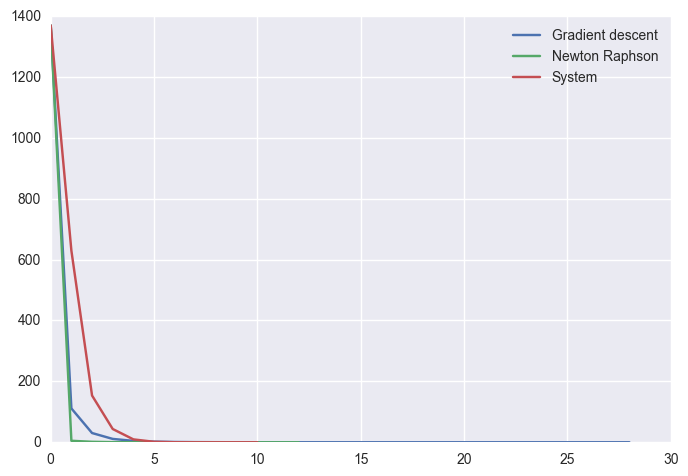

Final cost, solution, and iterations of Newton-Raphson: 0.000001 [ 0.92239283 -1.7743928] 12
Final cost, solution, and iterations of Gradient descent: 0.000001 [ 0.82306432 -1.8230643] 28
Final cost, solution, and iterations of Minimize: 0.000000 [ 1.2493901 -1.5617376] 10


In [31]:
x,x_full,nit_1=gradient_descent(func,start,0.05,1e-6)
x2,x2_full,nit_2=newton_raphson(func,start,0.1,1e-6)
its_1=np.arange(nit_1+1)
its_2=np.arange(nit_2+1)

its_sys=np.arange(nit_a+1)
plt.plot(its_1,cost(x_full)[0])
plt.plot(its_2,cost(x2_full)[0])
plt.plot(its_sys,cost(x_full_sys)[0])
plt.legend(('Gradient descent','Newton Raphson','System'))
plt.show()
print("Final cost, solution, and iterations of Newton-Raphson: %f" %cost(x2)[0],x2,nit_2)
print("Final cost, solution, and iterations of Gradient descent: %f"%cost(x)[0],x,nit_1)
print("Final cost, solution, and iterations of Minimize: %f"%cost(x_sys)[0],x_sys,nit_a)

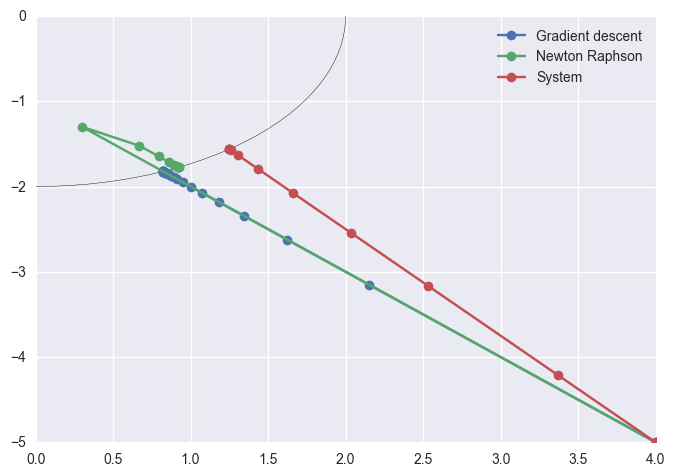

In [32]:
plt.plot(x_full[:,0],x_full[:,1],marker='o')
plt.plot(x2_full[:,0],x2_full[:,1],marker='o')
plt.plot(x_full_sys[:,0],x_full_sys[:,1],marker='o')
plt.plot(start[0],start[1], marker='x',linestyle='None')
plt.plot(0,0, marker='x',linestyle='None')
circle=plt.Circle(((0,0)), radius=2,fill=False)
plt.gca().add_patch(circle)
plt.legend(('Gradient descent','Newton Raphson','System'),loc=0)

plt.show()

In [34]:
%timeit x,x_full,nit_1=gradient_descent(func,start,0.05,1e-6)
%timeit x2,x2_full,nit_2=newton_raphson(func,start,0.1,1e-6)

1000 loops, best of 3: 1.19 ms per loop
1000 loops, best of 3: 528 µs per loop


In [35]:
%timeit a=scipy.optimize.minimize(cost,start,callback=acc,tol=1e-6,jac=1)

1000 loops, best of 3: 1.27 ms per loop


Seemingly, then, as much as I like NR, the pre-made solvers behave much better.
The pre-made solver, furthermore, does not require special finetuning of parameters.
Plot twist: going by the time it takes, newton-raphson seems to be actually faster... because we have finetuned its parameter to make it really fast

So if one knows a priori about the problem, one can finetune custom solvers to go quite fast. Premade algorithms will be more stable, no matter what the starting conditions. On average, they will win.